In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Members:

1. Chua Pei Jun

2. Liew Choy Yein

3. Yeoh Hao Jing


# **Program Scenario**

The Photo Viewer Application is designed to manage and interact with a collection of photos through a command-line interface. Users can initialize the photo collection from a file, add new photos, delete existing ones, edit photo descriptions, rename files, add tags, display photos, search by file name or tag, and create a photo collage.

# **Description of the Program Requirements**
- Input File: photos.txt, containing photo details (file name, description, tag) on consecutive lines.
- Features:
  - Initialize photo collection from a file.
  - Add, delete, edit, and rename photos.
  - Add tags to photos.
  - Display all photos or search for specific photos by file name or tag.
  - Save photos back to the file.
  - Create and display a photo collage.
- User Interface: Command-line based menu.

# **Problem Solved Using Object-Oriented Programming**
The program employs object-oriented programming (OOP) to manage and manipulate a collection of photos. It utilizes inheritance and composition as follows:

1) Inheritance:
- The `Photo` class inherits from the `Media` class, establishing an "is-a" relationship.
- This inheritance allows the `Photo` class to inherit attributes and behaviors from the `Media` class, facilitating code reuse and a hierarchical structure.

2) Composition:
- Composition is implemented in the `LinkedList` class to manage a collection of `Photo` objects.
- Each node in the linked list contains a pointer to a `Photo` object, enabling dynamic storage and manipulation of photos.
- The `LinkedList` class encapsulates the collection of photos and provides methods for operations such as addition, deletion, and search.

# **Analysis of the Problem**
- Input:

  - Photo details from the file: file name, description, and tag.
  - User commands and input via the command-line interface.
- Output:

  - Displayed photo details.
Messages indicating success or errors.
Collage display.
- Process:

  - Reading photo details from a file and initializing the list.
  - Adding, editing, renaming, deleting photos in the list.
  - Searching for photos by file name or tag.
  - Displaying all photos or specific photos.
  - Saving the updated list back to the file.
  - Creating and displaying a collage from selected photos.
- Constraints:

  - The input file must be properly formatted.
  - User input must follow the prompts correctly.
  - The program assumes valid data types (e.g., strings) for photo attributes.
- Assumptions:

  - The input file exists and is readable.
  - User inputs are valid and within the expected format.
  - There is enough memory to handle the linked list of photos.

# **How to Run the Program**
1. Run all the cell codes.
2. The program will display a menu with various options.
3. Enter the corresponding number for the operation you want to perform and follow the prompts.
4. For file operations (initialize/load/save), ensure photos.txt is in the same directory as the executable.
5. For adding/editing/deleting photos, adding tags, or creating a collage, follow the input prompts.
6. Select the "Exit" option from the menu to properly terminate the program.




# **UML Diagram**

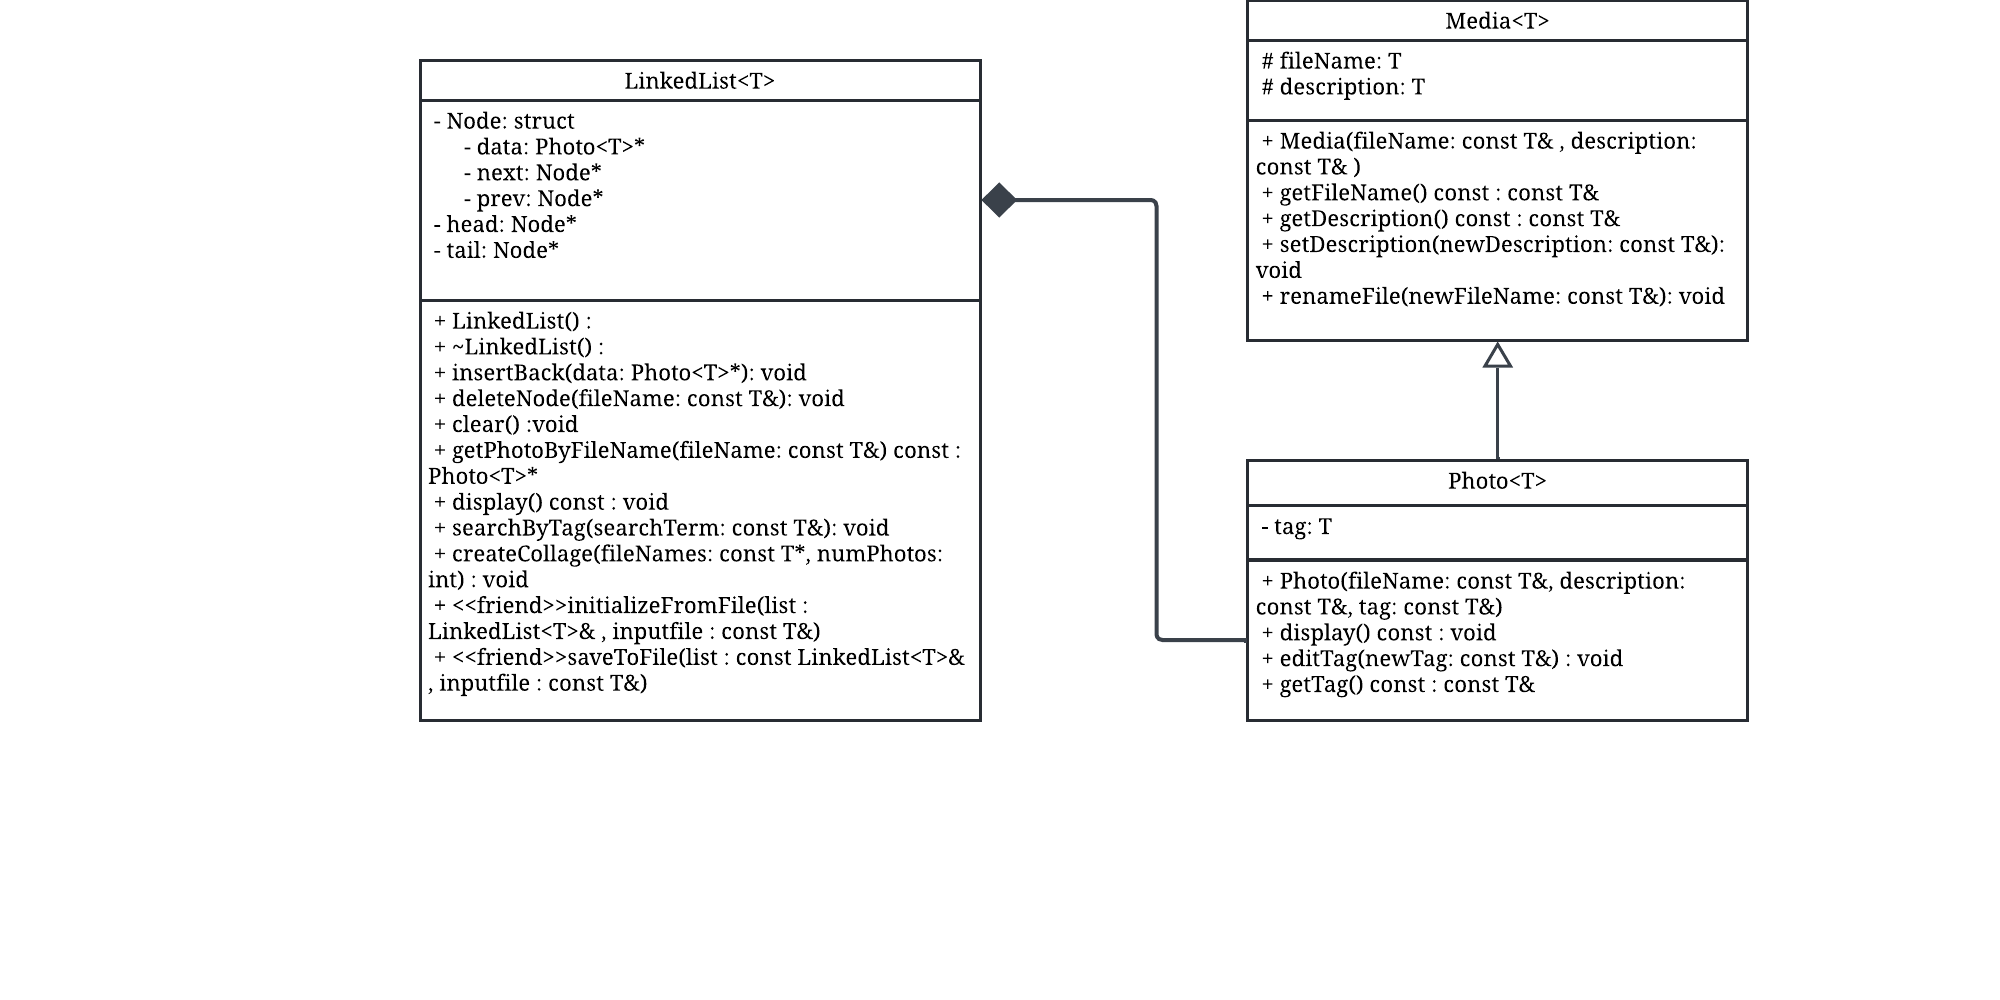

# **Header file "Media.h":**

In [ ]:
%%writefile Media.h
// Media.h

#ifndef MEDIA_H
#define MEDIA_H

#include <iostream>
using namespace std;

template<class T>
class Media {
protected:
    T fileName;    // Media filename
    T description;   // Media description

public:
    // Constructor
    Media(const T& fileName , const T& description = "")
        : fileName(fileName), description(description) {}

    // Getter for filename
    const T& getFileName() const {
        return fileName;
    }

    // Getter for description ,it returns a constant reference
    const T& getDescription() const {
        return description;
    }

    // Setter for description
    void setDescription(const T& newDescription) {
        description = newDescription;
    }

    // Rename Media filename
    void renameFile(const T& newFileName) {
        fileName = newFileName;
    }

};

#endif // MEDIA_H


Writing Media.h


# **Header file "Photo.h":**

In [ ]:
%%writefile Photo.h
// Photo.h

#ifndef PHOTO_H
#define PHOTO_H

#include "Media.h"
using namespace std;

// Derived class 'Photo' inherits from 'Media
template<class T>
class Photo : public Media<T> {
private:
    T tag;  // Tag associated with photo

public:
    // Constructor
    Photo(const T& fileName , const T& description = "", const T& tag = "")
        : Media<T>(fileName, description), tag(tag) {}

    // Display photo details like name, description and tag
    void display() const {
        cout << "File Name: " << this->getFileName() << ", Description: " << this->getDescription() << ", Tag: " << tag << endl;
    }

    // Edit tag of photo
    void editTag(const T& newTag) {
        tag = newTag;
    }

    // Getter for tag
    const T& getTag() const {
        return tag;
    }
};

#endif // PHOTO_H


Writing Photo.h


# **Header file "LinkedList.h":**

In [ ]:
%%writefile LinkedList.h
// LinkedList.h

#ifndef LINKEDLIST_H
#define LINKEDLIST_H

#include "Photo.h"
#include <fstream>
#include <iomanip>
using namespace std;

// Forward Declaration
template<class T>
class LinkedList;

// File operations
template<class T>
void initializeFromFile(LinkedList<T>& list, const T& inputfile);   // Initialize the LinkedList from input file

template<class T>
void saveToFile(const LinkedList<T>& list, const T& inputfile);   // Save edited LinkedList to same input file


// Class LinkedList
template<class T>
class LinkedList {
private:
    // Node structure for the linked list
    struct Node {
        Photo<T>* data; // Node contains a pointer to a Photo object
        Node* next;
        Node* prev;
    };

    Node* head;
    Node* tail;

public:
    // Constructor
    LinkedList() : head(nullptr), tail(nullptr) {}

    // Forward Declaration
    void clear();     // Clear List of all nodes

    // Destructor to clear the list
    ~LinkedList() {
        clear();
    }

    // Insert a new node at the end of the list
    void insertBack(Photo<T>* data);

    // Delete a node with a specific file name
    void deleteNode(const T& fileName);

    // Method to get a Photo object by file name
    Photo<T>* getPhotoByFileName(const T& fileName) const; // Method to get a Photo object by file name

    // Display all photos in the list
    void display() const;

    // Search for a photo by file name or tag
    void searchByTag(const T& searchTerm) const;

    // Create a collage of photos given their file names
    void createCollage(const T* fileNames, int numPhotos);

    // Friend functions for file operations
    friend void initializeFromFile<T>(LinkedList<T>& list, const T& inputfile);
    friend void saveToFile<T>(const LinkedList<T>& list, const T& inputfile);


};

#endif // LINKEDLIST_H


Writing LinkedList.h


# **Implementation file "LinkedList.cpp":**

In [ ]:
%%writefile LinkedList.cpp
#include "LinkedList.h"
#include "Photo.h"
#include <fstream>
#include <iomanip>
using namespace std;


// Clear all of the nodes
template<class T>
void LinkedList<T>::clear() {
    Node* current = head;
    while (current) {
        Node* next = current->next;
        delete current->data;
        delete current;
        current = next;
    }
    head = tail = nullptr;
}

// Add new node at the end of the list
template<class T>
void LinkedList<T>::insertBack(Photo<T>* data) {
        Node* newNode = new Node; // Create a new node
        newNode->data = data;
        newNode->next = nullptr;
        newNode->prev = nullptr;

        if (!tail) {
            head = tail = newNode;
        } else {
            newNode->prev = tail;
            tail->next = newNode;
            tail = newNode;
        }
    }

// Delete Node
template<class T>
void LinkedList<T>::deleteNode(const T& fileName) {
    // Start traversal from the head of the list
    Node* current = head;

    // Traverse the list until finding the node with the specified file name
    while (current && current->data->getFileName() != fileName) {
        current = current->next;
    }

    // If the node is not found, throw an exception
    if (!current) {
        string exception = "Photo not found";
        throw exception;
    }

    // If the current node has a previous node, update its next pointer
    if (current->prev) {
        current->prev->next = current->next;
    } else {
        // If the current node is the head, update the head pointer
        head = current->next;
    }

    // If the current node has a next node, update its previous pointer
    if (current->next) {
        current->next->prev = current->prev;
    } else {
        // If the current node is the tail, update the tail pointer
        tail = current->prev;
    }

    // Delete the data associated with the current node
    delete current->data;

    // Delete the current node itself
    delete current;
}


// Search node by photo filename
template<class T>
Photo<T>* LinkedList<T>::getPhotoByFileName(const T& fileName) const {
    Node* current = head;
    while (current) {
        if (current->data->getFileName() == fileName) {
            return current->data;
        }
        current = current->next;
    }
    string exception = "Photo not found";
    throw exception;
}

// Display All Nodes
template<class T>
void LinkedList<T>::display() const {
    Node* current = head;
    while (current) {
        current->data->display();   // Display photo object stored in Node
        current = current->next;
    }
}

// Search node by tag and display
template<class T>
void LinkedList<T>::searchByTag(const T& searchTerm) const {
    Node* current = head;
    bool found = false;
    while (current) {
        if (current->data->getTag() == searchTerm) {
            current->data->display();
            found = true;
        }
        current = current->next;
    }
    if (!found) {
        string exception = "Photo not found";
        throw exception;
    }
}

// Create Photos Collage
template<class T>
void LinkedList<T>::createCollage(const T* fileNames, int numPhotos) {
    // Allocate memory for collagePhotos dynamically
    Photo<T>* collagePhotos = new Photo<T>[numPhotos]; // Allocate memory for numPhotos Photo objects
    int count = 0;

    // Traverse the list to find the photos
    Node* current = head;
    while (current) {
        for (int i = 0; i < numPhotos; ++i) {
            if (current->data->getFileName() == fileNames[i]) {
                collagePhotos[count++] = *(current->data); // Copy the photo object
                break;
            }
        }
        current = current->next;
    }

    // Check if all requested photos were found
    if (count != numPhotos) {
        cout << "Error: Some photos were not found." << endl;
        delete[] collagePhotos; // Free memory
        return;
    }

    // Display collage in boxes
    for (int i = 0; i < count; ++i) {
        cout << "+----------------------------------------+\n";
        cout << "| File Name: " << setw(28) << left << collagePhotos[i].getFileName() << "|\n";
        cout << "| Description: " << setw(26) << left << collagePhotos[i].getDescription() << "|\n";
        cout << "| Tag: " << setw(34) << left << collagePhotos[i].getTag() << "|\n";
        cout << "+----------------------------------------+\n";
    }

    // Free memory allocated for collagePhotos
    delete[] collagePhotos;
}

Writing LinkedList.cpp


# **Implementation file "main.cpp":**

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <fstream>
#include "LinkedList.h"
#include "LinkedList.cpp"

using namespace std;

// Display Menu
void displayMenu() {
    cout << "\n📸Photo Viewer Application\n";
    cout << "1. Initialize from file\n";
    cout << "2. Add photo\n";
    cout << "3. Delete photo\n";
    cout << "4. Edit photo\n";
    cout << "5. Rename photo\n";
    cout << "6. Edit tag of photo\n";
    cout << "7. Display all photos\n";
    cout << "8. Display photo\n";
    cout << "9. Save to file\n";
    cout << "10. Search photo by tag or file name\n";
    cout << "11. Create photo collage\n";
    cout << "12. Exit\n";
    cout << "Enter your choice: ";
}


// Initialize the LinkedList from input file
template<class T>
void initializeFromFile(LinkedList<T>& list, const T& inputfile) {
    int totalPhoto = 0;
    ifstream infile(inputfile);
    if (!infile.is_open()) {
        string exception = "Could not open file";
        throw exception;
    }
    T fileName, description, tag;
    while (getline(infile, fileName) && getline(infile, description) && getline(infile, tag)) {
        list.insertBack(new Photo<T>(fileName, description, tag));
        totalPhoto += 1;
    }
    infile.close();
    cout << totalPhoto << " photos loaded from file. " << endl;
}

// Save the LinkedList to same input file
template<class T>
void saveToFile(const LinkedList<T>& list, const T& inputfile) {
    ofstream outfile(inputfile);
    if (!outfile.is_open()) {
        string exception = "Could not open file";
        throw exception;
    }
    class LinkedList<T>::Node* current = list.head;
    while (current) {
        outfile << current->data->getFileName() << endl;
        outfile << current->data->getDescription() << endl;
        outfile << current->data->getTag() << endl;
        current = current->next;
    }
    outfile.close();
}

int main() {
    LinkedList<string> list; // Modify this line to specify the type of data for LinkedList
    string inputfile = "photos.txt"; // Initialize inputfile with the input file

    while (true) {
        displayMenu();
        int choice;
        cin >> choice;
        cin.ignore();  // Ignore newline character

        try {
            switch (choice) {
                case 1:
                    // Intialize inputfile
                    initializeFromFile(list, inputfile);
                    break;
                case 2: {
                    // Add photo
                    int fileName;
                    string description, tag;
                    cout << "Enter photo file name: ";
                    getline(cin, fileName);
                    cout << "Enter photo description: ";
                    getline(cin, description);
                    cout << "Enter photo tag: ";
                    getline(cin, tag);
                    list.insertBack(new Photo<string>(fileName, description, tag));
                    cout << "Photo added.\n";
                    break;
                }
                case 3: {
                    // Delete photo
                    int fileName;
                    cout << "Enter photo file name to delete: ";
                    getline(cin, fileName);
                    list.deleteNode(fileName);
                    cout << "Photo deleted.\n";
                    break;
                }
                case 4: {
                    // Edit description
                    int fileName;
                    string newDescription;
                    cout << "Enter photo file name to edit: ";
                    getline(cin, fileName);
                    cout << "Enter new description: ";
                    getline(cin, newDescription);
                    Photo<string>* photo = list.getPhotoByFileName(fileName); // Access photo object
                    photo->setDescription(newDescription);
                    saveToFile(list, inputfile);
                    cout << "Photo description updated.\n";
                    break;
                }
                case 5: {
                    // Edit photo name
                    int oldFileName, newFileName;
                    cout << "Enter current photo file name: ";
                    getline(cin, oldFileName);
                    cout << "Enter new photo file name: ";
                    getline(cin, newFileName);
                    Photo<string>* photo = list.getPhotoByFileName(oldFileName);
                    photo->renameFile(newFileName);
                    saveToFile(list, inputfile);
                    cout << "Photo file name updated.\n";
                    break;
                }
                case 6: {
                    // Edit Tag
                    string fileName, tag;
                    cout << "Enter photo file name: ";
                    getline(cin, fileName);
                    cout << "Enter new tag: ";
                    getline(cin, tag);
                    Photo<string>* photo = list.getPhotoByFileName(fileName);
                    photo->editTag(tag);
                    saveToFile(list, inputfile);
                    cout << "Photo tag updated.\n";
                    break;
                }
                case 7:
                    // Display all photos
                    list.display();
                    break;
                case 8: {
                    // Display certain photo
                    string fileName;
                    cout << "Enter photo file name to display: ";
                    getline(cin, fileName);
                    try {
                        Photo<string>* photo = list.getPhotoByFileName(fileName);
                        photo->display();
                    } catch (string exception) {
                        cout << "Error: " << exception << endl;
                    }
                    break;
                }
                case 9:
                    // Save newly added/edited photo to inputfile
                    saveToFile(list, inputfile);
                    cout << "Photos saved to file.\n";
                    break;
                case 10: {
                    // Search photo by photo filename or tag
                    cout << "\nChoose search option:" << endl;
                    cout << "1. Search by filename" << endl;
                    cout << "2. Search by tag" << endl;
                    cout << "Enter your choice: ";
                    int searchOption;
                    cin >> searchOption;
                    cin.ignore(); // Ignore newline character

                    string searchTerm;
                    cout << "Enter search term: ";
                    getline(cin, searchTerm);

                    // Search by filename
                    if (searchOption == 1) {
                        cout << "Searching by filename...\n";
                        try {
                            Photo<string>* photo = list.getPhotoByFileName(searchTerm);
                            photo->display();
                        } catch (string exception) {
                            cout << "Error: " << exception << endl;
                        }
                    }
                    // Search by tag
                    else if (searchOption == 2) {
                        cout << "Searching by tag...\n";
                        try {
                            list.searchByTag(searchTerm);
                        } catch (string exception) {
                            cout << "Error: " << exception << endl;
                        }
                    } else {
                        cout << "Invalid choice. Please choose 1 or 2.\n";
                    }

                    break;
                }
                case 11: {
                    // Create Collage
                    cout << "Enter the number of photos to include in the collage: ";
                    int numPhotos;
                    cin >> numPhotos;
                    cin.ignore();

                    // Temporary storage for filenames
                    string* fileNames = new string[numPhotos];

                    // Collect filenames from user input
                    for (int i = 0; i < numPhotos; ++i) {
                        cout << "Enter file name for photo " << (i + 1) << ": ";
                        getline(cin, fileNames[i]);
                    }

                    try {
                        // Call createCollage function with filenames
                        list.createCollage(fileNames, numPhotos);
                    } catch (string exception) {
                        cout << "Error: " << exception << endl;
                    }

                    // Free memory allocated for filenames
                    delete[] fileNames;

                    break;
                }
                case 12:
                    // Exit and clear the list
                    cout << "Clearing the list...\n";
                    list.clear();
                    cout << "Exiting...\n";
                    return 0;
                default:
                    cout << "Invalid choice. Please try again.\n";
                    break;
            }
        } catch (string exception) {
            cout << "Error: " << exception << endl;
        }
    }
    return 0;
}


Writing main.cpp


# **Input file "Photos.txt":**

In [ ]:
%%writefile photos.txt
1
Description for photo 1
Nature
2
Description for photo 2
Travel
3
Description for photo 3
Family
4
Description for photo 4
Family

Writing photos.txt



# **Test Case 1:**
# **(1) Initialize, (2) Add photo, (3) Delete photo, (7) Display all photo, (9) Save to file**

In [ ]:
!g++ main.cpp Media.h	Photo.h LinkedList.h LinkedList.cpp -o output.a
!./output.a

main.cpp: In function ‘int main()’:
main.cpp:84:28: error: no matching function for call to ‘getline(std::istream&, int&)’
   84 |                     getline(cin, fileName);
      |                     ~~~~~~~^~~~~~~~~~~~~~~
In file included from /usr/include/c++/11/string:56,
                 from /usr/include/c++/11/bits/locale_classes.h:40,
                 from /usr/include/c++/11/bits/ios_base.h:41,
                 from /usr/include/c++/11/ios:42,
                 from /usr/include/c++/11/ostream:38,
                 from /usr/include/c++/11/iostream:39,
                 from main.cpp:1:
/usr/include/c++/11/bits/basic_string.tcc:1557:5: note: candidate: ‘template<class _CharT, class _Traits, class _Alloc> std::basic_istream<_CharT, _Traits>& std::getline(std::basic_istream<_CharT, _Traits>&, std::__cxx11::basic_string<_CharT, _Traits, _Allocator>&, _CharT)’
 1557 |     getline(basic_istream<_CharT, _Traits>& __in,
      |     ^~~~~~~
/usr/include/c++/11/bits/basic_string.tcc:155


# **Test Case 2:**
# **(4) Edit description, (5) Rename photo, (6) Edit tag, (8) Display one photo**

In [ ]:
!g++ main.cpp Media.h	Photo.h LinkedList.h LinkedList.cpp -o output.a
!./output.a

main.cpp: In function ‘int main()’:
main.cpp:84:28: error: no matching function for call to ‘getline(std::istream&, int&)’
   84 |                     getline(cin, fileName);
      |                     ~~~~~~~^~~~~~~~~~~~~~~
In file included from /usr/include/c++/11/string:56,
                 from /usr/include/c++/11/bits/locale_classes.h:40,
                 from /usr/include/c++/11/bits/ios_base.h:41,
                 from /usr/include/c++/11/ios:42,
                 from /usr/include/c++/11/ostream:38,
                 from /usr/include/c++/11/iostream:39,
                 from main.cpp:1:
/usr/include/c++/11/bits/basic_string.tcc:1557:5: note: candidate: ‘template<class _CharT, class _Traits, class _Alloc> std::basic_istream<_CharT, _Traits>& std::getline(std::basic_istream<_CharT, _Traits>&, std::__cxx11::basic_string<_CharT, _Traits, _Allocator>&, _CharT)’
 1557 |     getline(basic_istream<_CharT, _Traits>& __in,
      |     ^~~~~~~
/usr/include/c++/11/bits/basic_string.tcc:155


# **Test Case 3:**
# **(10) Search photo, (11) Create photo collage, (12) Exit (clear the list)**

In [ ]:
!g++ main.cpp Media.h	Photo.h LinkedList.h LinkedList.cpp -o output.a
!./output.a

main.cpp: In function ‘int main()’:
main.cpp:84:28: error: no matching function for call to ‘getline(std::istream&, int&)’
   84 |                     getline(cin, fileName);
      |                     ~~~~~~~^~~~~~~~~~~~~~~
In file included from /usr/include/c++/11/string:56,
                 from /usr/include/c++/11/bits/locale_classes.h:40,
                 from /usr/include/c++/11/bits/ios_base.h:41,
                 from /usr/include/c++/11/ios:42,
                 from /usr/include/c++/11/ostream:38,
                 from /usr/include/c++/11/iostream:39,
                 from main.cpp:1:
/usr/include/c++/11/bits/basic_string.tcc:1557:5: note: candidate: ‘template<class _CharT, class _Traits, class _Alloc> std::basic_istream<_CharT, _Traits>& std::getline(std::basic_istream<_CharT, _Traits>&, std::__cxx11::basic_string<_CharT, _Traits, _Allocator>&, _CharT)’
 1557 |     getline(basic_istream<_CharT, _Traits>& __in,
      |     ^~~~~~~
/usr/include/c++/11/bits/basic_string.tcc:155


# **Test Case 4:**
# **Error handling: Try, Throw, Catch**

In [ ]:
!g++ main.cpp Media.h	Photo.h LinkedList.h LinkedList.cpp -o output.a
!./output.a

main.cpp: In function ‘int main()’:
main.cpp:84:28: error: no matching function for call to ‘getline(std::istream&, int&)’
   84 |                     getline(cin, fileName);
      |                     ~~~~~~~^~~~~~~~~~~~~~~
In file included from /usr/include/c++/11/string:56,
                 from /usr/include/c++/11/bits/locale_classes.h:40,
                 from /usr/include/c++/11/bits/ios_base.h:41,
                 from /usr/include/c++/11/ios:42,
                 from /usr/include/c++/11/ostream:38,
                 from /usr/include/c++/11/iostream:39,
                 from main.cpp:1:
/usr/include/c++/11/bits/basic_string.tcc:1557:5: note: candidate: ‘template<class _CharT, class _Traits, class _Alloc> std::basic_istream<_CharT, _Traits>& std::getline(std::basic_istream<_CharT, _Traits>&, std::__cxx11::basic_string<_CharT, _Traits, _Allocator>&, _CharT)’
 1557 |     getline(basic_istream<_CharT, _Traits>& __in,
      |     ^~~~~~~
/usr/include/c++/11/bits/basic_string.tcc:155

In [ ]:
!g++ main.cpp Media.h	Photo.h LinkedList.h LinkedList.cpp -o output.a
!./output.a

main.cpp: In function ‘int main()’:
main.cpp:84:28: error: no matching function for call to ‘getline(std::istream&, int&)’
   84 |                     getline(cin, fileName);
      |                     ~~~~~~~^~~~~~~~~~~~~~~
In file included from /usr/include/c++/11/string:56,
                 from /usr/include/c++/11/bits/locale_classes.h:40,
                 from /usr/include/c++/11/bits/ios_base.h:41,
                 from /usr/include/c++/11/ios:42,
                 from /usr/include/c++/11/ostream:38,
                 from /usr/include/c++/11/iostream:39,
                 from main.cpp:1:
/usr/include/c++/11/bits/basic_string.tcc:1557:5: note: candidate: ‘template<class _CharT, class _Traits, class _Alloc> std::basic_istream<_CharT, _Traits>& std::getline(std::basic_istream<_CharT, _Traits>&, std::__cxx11::basic_string<_CharT, _Traits, _Allocator>&, _CharT)’
 1557 |     getline(basic_istream<_CharT, _Traits>& __in,
      |     ^~~~~~~
/usr/include/c++/11/bits/basic_string.tcc:155